# Exercises:
##### Exercise 2.2: "Cache blocking"
* Implement the example in the top of section 1.7.4 (p. 55) in Python. Use while loop instead of for loop. Also, use Numba to compile your Python function for highest performance. Interpreted Python is too slow to reveal the difference in cache latency.
* Increase the l1size parameter, measure the execution time and calculate the time per operation. At some point, when exceeding the L1 cache size (often 32 KB), the time per operation should increase.
* Extend the code to use the cache blocking principle and verify that the time per operation goes down.

In [5]:
# Importing libraries
import matplotlib.pyplot as plt
from numba import jit
import numpy as np
import cv2 as cv
import timeit
import time

# Simple implementation of cache sizing?
@jit(nopython=True)
def cache_size( n_runs, size):
    i = 0
    arr = np.zeros(size)
    while i < n_runs:
        j = 0
        while j < size:
            arr[j] = 2.3 * arr[j] + 1.2
            j += 1
        i += 1
    
    return None

# Simple implementation of cache blocking
@jit(nopython=True)
def cache_blocking(l1size, n_runs, size):
    b = 0
    i = 0
    arr = np.zeros(size)
    while b < size / l1size:
        blockstart = 0
        while i < n_runs:
            j = 0
            while j < l1size and b + j < size:
                arr[blockstart + j] = 2.3 * arr[blockstart + j] + 1.2
                j += 1
            i += 1
        blockstart += l1size
        b += 1
    
    return None

In [6]:
# Driver code
if __name__ == "__main__":
    runs = 2
    
    n_runs = 100000
    size = 100000
    
    l1size = int(32*1024/8) # 32 KB L1 cache, 8 byte per value in data.
    l2size = int(256*1024/8) # 256 KB L2 cache, 8 byte per value in data.
    
    time = timeit.timeit(lambda:cache_size(n_runs, size), number=runs) / runs
    print("Avg execution time:", time, "s")
    
    time = timeit.timeit(lambda:cache_blocking(l1size, n_runs, size), number=runs) / runs
    print("Avg execution time:", time, "s")

Avg execution time: 1.8905580000000555 s
Avg execution time: 0.09163200000011784 s


1.0  KB
2.0  KB
3.0  KB
4.0  KB
5.0  KB
6.0  KB
7.0  KB
8.0  KB
9.0  KB
10.0  KB
11.0  KB
12.0  KB
13.0  KB
14.0  KB
15.0  KB
16.0  KB
17.0  KB
18.0  KB
19.0  KB
20.0  KB
21.0  KB
22.0  KB
23.0  KB
24.0  KB
25.0  KB
26.0  KB
27.0  KB
28.0  KB
29.0  KB
30.0  KB
31.0  KB
32.0  KB
33.0  KB
34.0  KB
35.0  KB
36.0  KB
37.0  KB
38.0  KB
39.0  KB
40.0  KB
41.0  KB
42.0  KB
43.0  KB
44.0  KB
45.0  KB
46.0  KB
47.0  KB
48.0  KB
49.0  KB
50.0  KB
51.0  KB
52.0  KB
53.0  KB
54.0  KB
55.0  KB
56.0  KB
57.0  KB
58.0  KB
59.0  KB
60.0  KB
61.0  KB
62.0  KB
63.0  KB
64.0  KB
65.0  KB
66.0  KB
67.0  KB
68.0  KB
69.0  KB
70.0  KB
71.0  KB
72.0  KB
73.0  KB
74.0  KB
75.0  KB
76.0  KB
77.0  KB
78.0  KB
79.0  KB
80.0  KB
81.0  KB
82.0  KB
83.0  KB
84.0  KB
85.0  KB
86.0  KB
87.0  KB
88.0  KB
89.0  KB
90.0  KB
91.0  KB
92.0  KB
93.0  KB
94.0  KB
95.0  KB
96.0  KB
97.0  KB
98.0  KB
99.0  KB
100.0  KB
101.0  KB
102.0  KB
103.0  KB
104.0  KB
105.0  KB
106.0  KB
107.0  KB
108.0  KB
109.0  KB
110.0  KB
111.0  K

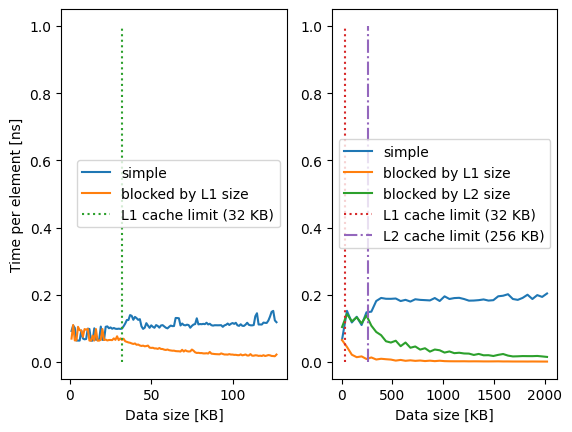

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 15 15:14:25 2021

@author: jjn
"""

import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from numba import jit

NRUNS = 5000

l1size = int(32*1024/8) # 32 KB L1 cache, 8 byte per value in data.
l2size = int(256*1024/8) # 256 KB L2 cache, 8 byte per value in data.

@jit(nopython=True)
def cachesize(data):
    i = 0
    LIM = data.shape[0]
    while i<NRUNS:
        #print(data.shape[0])
        j = 0
        while j < LIM:
            data[j] = 2.3*data[j]+1.2
            j += 1
        i += 1
       
        
@jit(nopython=True)
def cachesize_blockl1(data):
    b = 0 # block offset
    i = 0
    size = data.shape[0]
    while b<size:
        while i<NRUNS:
            #print(data.shape[0])
            j = 0
            while j < l1size and j+b < size:
                data[b+j] = 2.3*data[b+j]+1.2
                j += 1
            i += 1
        b += l1size


@jit(nopython=True)
def cachesize_blockl2(data):
    b = 0 # block offset
    i = 0
    size = data.shape[0]
    while b<size:
        while i<NRUNS:
            #print(data.shape[0])
            j = 0
            while j < l2size and j+b < size:
                data[b+j] = 2.3*data[b+j]+1.2
                j += 1
            i += 1
        b += l2size

# Execute each function once to force Numba to compile.
data = np.random.random(10)        
cachesize(data)
data = np.random.random(10)        
cachesize_blockl1(data)
data = np.random.random(10)        
cachesize_blockl2(data)


STEP = 128
K = 1
UL = STEP**2
t_list = []
tbl1_list = []
for asiz in range(STEP,UL,STEP*K):  
    print(asiz/1024*8,' KB')
    data = np.random.random(asiz)        
    start = timer()
    cachesize(data)
    end = timer()
    t_list.append((end-start)/asiz/NRUNS*1e9)
    data = np.random.random(asiz)        
    start = timer()
    cachesize_blockl1(data)
    end = timer()
    tbl1_list.append((end-start)/asiz/NRUNS*1e9)
plt.subplot(121)
plt.plot(np.array(range(STEP,UL,STEP*K))*8/1024,t_list,label='simple')
plt.plot(np.array(range(STEP,UL,STEP*K))*8/1024,tbl1_list,label='blocked by L1 size')
plt.plot([32,32],[0,1],':',label='L1 cache limit (32 KB)')
plt.ylabel('Time per element [ns]')
plt.xlabel('Data size [KB]')
plt.legend()


STEP = 512
K = 12
UL = STEP**2
t_list = []
tbl1_list = []
tbl2_list = []
for asiz in range(STEP,UL,STEP*K):  
    print(asiz/1024*8,' KB')
    data = np.random.random(asiz)        
    start = timer()
    cachesize(data)
    end = timer()
    t_list.append((end-start)/asiz/NRUNS*1e9)
    data = np.random.random(asiz)        
    start = timer()
    cachesize_blockl1(data)
    end = timer()
    tbl1_list.append((end-start)/asiz/NRUNS*1e9)
    data = np.random.random(asiz)        
    start = timer()
    cachesize_blockl2(data)
    end = timer()
    tbl2_list.append((end-start)/asiz/NRUNS*1e9)
plt.subplot(122)
plt.plot(np.array(range(STEP,UL,STEP*K))*8/1024,t_list,label='simple')
plt.plot(np.array(range(STEP,UL,STEP*K))*8/1024,tbl1_list,label='blocked by L1 size')
plt.plot(np.array(range(STEP,UL,STEP*K))*8/1024,tbl2_list,label='blocked by L2 size')
plt.plot([32,32],[0,1],':',label='L1 cache limit (32 KB)')
plt.plot([256,256],[0,1],'-.',label='L2 cache limit (256 KB)')
plt.xlabel('Data size [KB]')
plt.legend()




# Intel core i9
#  L1 Data cache: 32 KB
#  L2 Cache (per Core):	256 KB
#  L3 Cache:	16 MB